In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import ot
import ot.plot
from scipy.misc import derivative
from scipy.spatial.distance import cdist
import pandas as pd
import os

#### sorted by wasserstein distance
[10 15 25 20 30 35 40 45 50]

In [18]:
# load data
soc5 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-030.xlsx', engine='openpyxl').values
soc10 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-035.xlsx', engine='openpyxl').values
label = pd.read_excel('/Users/liuhanbing/Desktop/code/cdot/source.xlsx', engine='openpyxl').values

soc5_xs = soc5[:, 2 : 23] # (67, 21)
soc5_ys = soc5[:, 1] # (67, )
soc5_ys = label[:, 1]

soc10_xt = soc10[:, 2 : 23] # (67, 21)
soc10_yt = soc10[:, 1] # (67, )
print(soc10_yt.shape)


(67,)


In [19]:
# loss matrix
M = ot.dist(soc5_xs, soc10_xt, metric='euclidean') 
M /= M.max() # (67, 67)
n1 = soc5_xs.shape[0]
n2 = soc10_xt.shape[0]
a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2  # uniform distribution on samples
print(M.shape)
print(n1, n2)

(67, 67)
67 67


In [20]:
lambd = 0.01
max_epoch = 10
step_size = 0.1
mut = 50

In [21]:
gamma0 = ot.sinkhorn(a, b, M, lambd) # (67, 67)
print(gamma0)
print(gamma0.shape)
def derivation(gamma):
    tmp1 = 2 * (n1 ** 2) * soc5_xs @ soc5_xs.T @ gamma
    
    tmp2 = (n0 * n1) * soc5_xs @ soc0_x.T @ gamma_t0
    return tmp1 - 2 * tmp2


[[5.27046719e-04 2.78263415e-04 1.92267230e-04 ... 1.22607602e-04
  8.77719397e-05 8.62362367e-05]
 [5.06522165e-04 3.00533442e-04 2.03673800e-04 ... 1.21992001e-04
  8.97531724e-05 8.85496191e-05]
 [3.99350375e-04 3.31756917e-04 2.31883252e-04 ... 1.37573622e-04
  1.06911179e-04 1.06662249e-04]
 ...
 [7.22252376e-19 3.06487914e-11 4.53709914e-04 ... 3.13478792e-04
  2.25292232e-04 2.19561505e-04]
 [7.54894766e-36 3.33720457e-28 1.53609393e-19 ... 7.20992167e-04
  5.90504572e-04 5.75465691e-04]
 [2.75104686e-42 1.21202272e-34 5.56222308e-26 ... 4.36109758e-04
  8.51201544e-04 8.39132266e-04]]
(67, 67)


In [22]:
gamma = np.random.rand(n1, n2)
for i in range(max_epoch):
    c = step_size * M + step_size * mut * derivation(gamma) - np.log(gamma)
    c /= c.max()
    gamma = ot.sinkhorn(a, b, c, 1+step_size*lambd)

# gamma = gamma0

print(gamma)


[[0.00022321 0.00022313 0.00022295 ... 0.00022226 0.00022254 0.00022236]
 [0.0002231  0.00022304 0.0002229  ... 0.00022239 0.0002226  0.00022247]
 [0.00022296 0.00022292 0.00022284 ... 0.00022255 0.00022267 0.00022259]
 ...
 [0.00022249 0.00022254 0.00022266 ... 0.00022308 0.0002229  0.00022302]
 [0.00022212 0.00022223 0.00022251 ... 0.00022351 0.00022309 0.00022336]
 [0.00022198 0.00022212 0.00022245 ... 0.00022367 0.00022316 0.00022349]]


In [23]:
xt = n1 * gamma.dot(soc10_xt)
# yt = n1 * gamma.T.dot(soc5_ys)
# loss = np.mean(np.square(yt - soc10_yt))

# pl.plot(soc5_xs[0, :], '+b', label='Source samples')
# pl.plot(xt[0, :], 'xr', label='Transported samples')
# # pl.plot(soc10_xt[0, :], '+g', label='Target samples')
# pl.legend(loc=0)
# pl.title('OT matrix Sinkhorn with samples')

Text(0.5, 1.0, 'OT matrix sinkhorn')

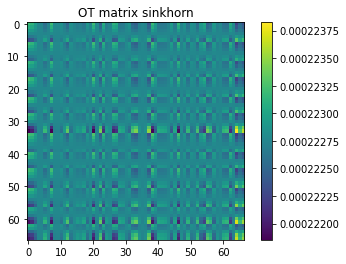

In [24]:
pl.figure(5)

pl.imshow(gamma, interpolation='nearest')
pl.colorbar()

pl.title('OT matrix sinkhorn')

# pl.figure(6)
# ys = np.expand_dims(soc5_ys, axis = 1)
# yt = np.expand_dims(soc10_yt, axis = 1)

# x = np.arange(n1)

# ot.plot.plot2D_samples_mat(soc5_xs, soc10_xt, gamma, color=[.5, .5, 1])
# pl.plot(x, ys, '+b', label='Source samples')
# pl.plot(x, yt, 'xr', label='Target samples')
# pl.legend(loc=0)
# pl.title('OT matrix Sinkhorn with samples')
# pl.show()


In [25]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import r2_score
model_SVR = svm.SVR()
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=4)
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()

score = 0
def try_different_method(model):
    model.fit(xt, soc5_ys)
    # score = model.score(soc10_xt, soc10_yt)
    result = model.predict(soc10_xt)
    score = r2_score(result, soc10_yt)
    loss = np.mean(np.square(result - soc10_yt))
    print("score ", score)
    print("loss ", loss)

    return result, loss, score

result, loss, score = try_different_method(model_RandomForestRegressor)
minloss = loss
bestresult = result
ascore = score

for i in range(9):  
    result, loss, score = try_different_method(model_RandomForestRegressor)
    if(loss < minloss):
        minloss = loss
        bestresult = result
        ascore = score
        
print("model score ", ascore)
print("min loss ", minloss)

data = pd.DataFrame(bestresult)

writer = pd.ExcelWriter('source.xlsx')
data.to_excel(writer, 'page_1', float_format='%.5f')
writer.save()

writer.close()


score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.9457424379573584e+29
loss  0.02438439285373134
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
score  -4.945742437957358e+29
loss  0.024384392853731347
model score  -4.9457424379573584e+29
min loss  0.02438439285373134


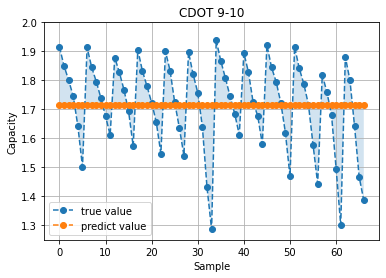

In [26]:
y = np.zeros((67,1))
y[:,0] = soc10_yt[:]
plt.figure()
plt.plot(np.arange(67), soc10_yt,'o--',label='true value')
plt.plot(np.arange(67), bestresult,'o--',label='predict value')

plt.grid()
plt.title('score: %f'%score)

plt.title('CDOT 9-10')
plt.xlabel('Sample')
plt.ylabel('Capacity')
plt.legend()
plt.fill_between(np.arange(67), bestresult.squeeze(), y.squeeze(), alpha=0.2)
plt.ylim([1.25, 2])
plt.show()


In [16]:
soc0_x = soc5_xs
gamma_t0 = gamma
n0 = n1

Text(0, 0.5, 'loss')

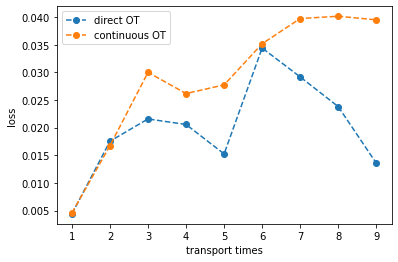

In [45]:
x = np.arange(9) + 1
ls = []
seq_ls = []

pt = "/Users/liuhanbing/Desktop/code/cdot/log.txt"
with open(pt) as f:
    lines = f.readlines()
for line in lines:
    seq = line.split('\t')
    ls.append(float(seq[0]))

pt = "/Users/liuhanbing/Desktop/code/cdot/seq-log.txt"
with open(pt) as f:
    lines = f.readlines()
for line in lines:
    seq = line.split('\t')
    seq_ls.append(float(seq[0]))

plt.figure()
plt.plot(x, ls,'o--',label='direct OT')
plt.plot(x, seq_ls,'o--',label='continuous OT')
plt.legend()
plt.xlabel('transport times')
plt.ylabel('loss')

### PCA

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [45]:
# load data
soc05 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-005.xlsx', engine='openpyxl').values
soc10 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-010.xlsx', engine='openpyxl').values
soc15 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-015.xlsx', engine='openpyxl').values
soc20 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-020.xlsx', engine='openpyxl').values
soc25 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-025.xlsx', engine='openpyxl').values
soc30 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-030.xlsx', engine='openpyxl').values
soc35 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-035.xlsx', engine='openpyxl').values
soc40 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-040.xlsx', engine='openpyxl').values
soc45 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-045.xlsx', engine='openpyxl').values
soc50 = pd.read_excel('/Users/liuhanbing/Desktop/code/out_SOC_005-075_excel/out-SOC-050.xlsx', engine='openpyxl').values

soc05_x = soc05[:, 2 : 23]
soc10_x = soc10[:, 2 : 23]
soc15_x = soc15[:, 2 : 23]
soc20_x = soc20[:, 2 : 23]
soc25_x = soc25[:, 2 : 23]
soc30_x = soc30[:, 2 : 23]
soc35_x = soc35[:, 2 : 23]
soc40_x = soc40[:, 2 : 23]
soc45_x = soc45[:, 2 : 23]
soc50_x = soc50[:, 2 : 23]


In [46]:
n1 = soc5_xs.shape[0]
n2 = soc10_xt.shape[0]
a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2  # uniform distribution on samples

In [47]:
M1 = ot.dist(soc05_x, soc10_x, metric='euclidean') 
M2 = ot.dist(soc05_x, soc15_x, metric='euclidean') 
M3 = ot.dist(soc05_x, soc20_x, metric='euclidean') 
M4 = ot.dist(soc05_x, soc25_x, metric='euclidean') 
M5 = ot.dist(soc05_x, soc30_x, metric='euclidean') 
M6 = ot.dist(soc05_x, soc35_x, metric='euclidean') 
M7 = ot.dist(soc05_x, soc40_x, metric='euclidean') 
M8 = ot.dist(soc05_x, soc45_x, metric='euclidean') 
M9 = ot.dist(soc05_x, soc50_x, metric='euclidean') 

M1 /= M1.max()
M2 /= M2.max()
M3 /= M3.max()
M4 /= M4.max()
M5 /= M5.max()
M6 /= M6.max()
M7 /= M7.max()
M8 /= M8.max()
M9 /= M9.max()

In [48]:
w_dist = []
for i in range(9):
    m = "M{}".format(i+1)
    m = eval(m)
    c = ot.sinkhorn2(a, b, m, 1)
    w_dist.append(c[0])
print(w_dist)
argod = np.argsort(w_dist)
print(argod*5 + 10)

[0.5019350078619227, 0.6377090878666845, 0.6822332909735622, 0.6750964638103856, 0.6899762167676761, 0.7403314935178459, 0.789953418846622, 0.8194369657034292, 0.8280240958202888]
[10 15 25 20 30 35 40 45 50]


Text(0, 0.5, 'W-distance')

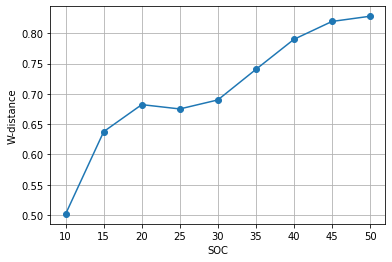

In [69]:
x = np.arange(10, 55, 5)
plt.plot(x, w_dist, 'o-')
plt.grid()
plt.xlabel('SOC')
plt.ylabel('W-distance')


In [40]:
pca.fit(soc05_x)
X05 = pca.transform(soc05_x) 

pca.fit(soc10_x)
X10 = pca.transform(soc10_x) 

pca.fit(soc15_x)
X15 = pca.transform(soc15_x) 

pca.fit(soc20_x)
X20 = pca.transform(soc20_x)

pca.fit(soc25_x)
X25 = pca.transform(soc25_x)

pca.fit(soc30_x)
X30 = pca.transform(soc30_x)

pca.fit(soc35_x)
X35 = pca.transform(soc35_x)

pca.fit(soc40_x)
X40 = pca.transform(soc40_x)

pca.fit(soc45_x)
X45 = pca.transform(soc45_x)

pca.fit(soc50_x)
X50 = pca.transform(soc50_x)

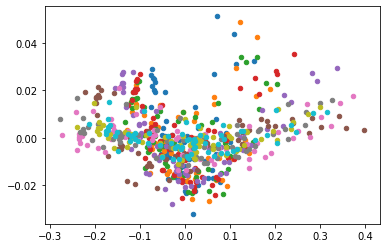

In [1009]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
# ax = Axes3D(fig)
# ax.scatter(X05[:, 0],X05[:, 1],X05[:, 2])
# ax.scatter(X10[:, 0],X10[:, 1],X10[:, 2])
# ax.scatter(X15[:, 0],X15[:, 1],X15[:, 2])
# ax.scatter(X20[:, 0],X20[:, 1],X20[:, 2])
# ax.scatter(X25[:, 0],X25[:, 1],X25[:, 2])
# ax.scatter(X30[:, 0],X30[:, 1],X30[:, 2])
# ax.scatter(X35[:, 0],X35[:, 1],X35[:, 2])
# ax.scatter(X40[:, 0],X40[:, 1],X40[:, 2])
# ax.scatter(X45[:, 0],X45[:, 1],X45[:, 2])
# ax.scatter(X50[:, 0],X50[:, 1],X50[:, 2])



plt.scatter(X05[:, 0], X05[:, 1], marker='o', s=20)
plt.scatter(X10[:, 0], X10[:, 1], marker='o', s=20)
plt.scatter(X15[:, 0], X15[:, 1], marker='o', s=20)
plt.scatter(X20[:, 0], X20[:, 1], marker='o', s=20)
plt.scatter(X25[:, 0], X25[:, 1], marker='o', s=20)
plt.scatter(X30[:, 0], X30[:, 1], marker='o', s=20)
plt.scatter(X35[:, 0], X35[:, 1], marker='o', s=20)
plt.scatter(X40[:, 0], X40[:, 1], marker='o', s=20)
plt.scatter(X45[:, 0], X45[:, 1], marker='o', s=20)
plt.scatter(X50[:, 0], X50[:, 1], marker='o', s=20)

plt.show()


### kernel PCA

In [1036]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=30)

In [1037]:
kpca.fit(soc05_x)
X05 = kpca.transform(soc05_x) 

kpca.fit(soc10_x)
X10 = kpca.transform(soc10_x) 

kpca.fit(soc15_x)
X15 = kpca.transform(soc15_x) 

kpca.fit(soc20_x)
X20 = kpca.transform(soc20_x)

kpca.fit(soc25_x)
X25 = kpca.transform(soc25_x)

kpca.fit(soc30_x)
X30 = kpca.transform(soc30_x)

kpca.fit(soc35_x)
X35 = kpca.transform(soc35_x)

kpca.fit(soc40_x)
X40 = kpca.transform(soc40_x)

kpca.fit(soc45_x)
X45 = kpca.transform(soc45_x)

kpca.fit(soc50_x)
X50 = kpca.transform(soc50_x)

In [1023]:
X05 == X15

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

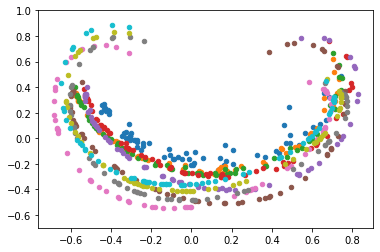

In [1035]:
plt.ylim([-0.7, 1])
plt.scatter(X05[:, 0], X05[:, 1], marker='o', s=20)
plt.scatter(X10[:, 0], X10[:, 1], marker='o', s=20)
plt.scatter(X15[:, 0], X15[:, 1], marker='o', s=20)
plt.scatter(X20[:, 0], X20[:, 1], marker='o', s=20)
plt.scatter(X25[:, 0], X25[:, 1], marker='o', s=20)
plt.scatter(X30[:, 0], X30[:, 1], marker='o', s=20)
plt.scatter(X35[:, 0], X35[:, 1], marker='o', s=20)
plt.scatter(X40[:, 0], X40[:, 1], marker='o', s=20)
plt.scatter(X45[:, 0], X45[:, 1], marker='o', s=20)
plt.scatter(X50[:, 0], X50[:, 1], marker='o', s=20)

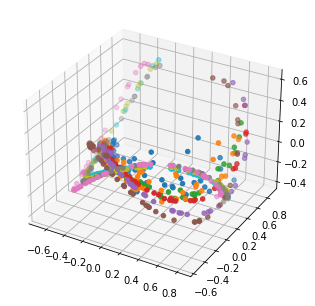

In [1038]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X05[:, 0],X05[:, 1],X05[:, 2])
ax.scatter(X10[:, 0],X10[:, 1],X10[:, 2])
ax.scatter(X15[:, 0],X15[:, 1],X15[:, 2])
ax.scatter(X20[:, 0],X20[:, 1],X20[:, 2])
ax.scatter(X25[:, 0],X25[:, 1],X25[:, 2])
ax.scatter(X30[:, 0],X30[:, 1],X30[:, 2])
ax.scatter(X35[:, 0],X35[:, 1],X35[:, 2])
ax.scatter(X40[:, 0],X40[:, 1],X40[:, 2])
ax.scatter(X45[:, 0],X45[:, 1],X45[:, 2])
ax.scatter(X50[:, 0],X50[:, 1],X50[:, 2])

plt.show()